# Добро пожаловать в Distonx #

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sys
sys.path.append('..')
from stonks.DataCatcher import db

db - это класс штуковины, которая обращается к нашей базе данных и вытаскивает оттуда дату. Ниже мы берем данные за последний час по биткоину.

In [5]:
from IPython.display import clear_output
import time

def fetch_last(dbase, indent=4000):
    names = dbase.get_columns_names()
    data = dbase.get_data_from_DB(time.time() - indent, time.time(), pair_name='btcusdt')
    data = pd.DataFrame(data=data, columns=names)
    return data

dbase = db()
data = fetch_last(dbase, 3600)
clear_output()

Вот как они выглядят:

In [6]:
data.head()

,id,time,currency_pair,kline_trade_number,kline_open_price,kline_close_price,kline_high_price,kline_low_price,kline_base_volume,kline_quote_volume,...,depth_ask_quantity_11,depth_ask_quantity_12,depth_ask_quantity_13,depth_ask_quantity_14,depth_ask_quantity_15,depth_ask_quantity_16,depth_ask_quantity_17,depth_ask_quantity_18,depth_ask_quantity_19,depth_ask_quantity_20
0,16105506,1.585138e+09,btcusdt,549,6509.36,6521.36,6522.55,6506.48,59.294851,386177.754339,...,0.616064,0.904080,0.487237,0.680161,0.004251,0.003000,0.002101,0.250000,0.200000,0.002255
1,16105517,1.585138e+09,btcusdt,549,6509.36,6521.36,6522.55,6506.48,59.294851,386177.754339,...,0.680161,0.004251,0.003000,0.002101,0.200000,0.002255,0.200000,0.100000,0.076661,0.012563
2,16105528,1.585138e+09,btcusdt,549,6509.36,6521.36,6522.55,6506.48,59.294851,386177.754339,...,0.327481,0.203207,0.101560,0.076643,0.300060,0.150000,0.004497,0.496804,0.238363,0.010000
3,16105539,1.585138e+09,btcusdt,549,6509.36,6521.36,6522.55,6506.48,59.294851,386177.754339,...,0.250000,0.150000,0.004497,0.010000,0.153215,0.200000,0.024843,0.004251,0.336005,0.028565
4,16105550,1.585138e+09,btcusdt,549,6509.36,6521.36,6522.55,6506.48,59.294851,386177.754339,...,2.000000,0.200000,0.327481,0.076642,0.150000,0.004497,0.250000,0.024300,0.163260,0.024843


In [7]:
print(*list(data.columns), sep='\n')

id
time
currency_pair
kline_trade_number
kline_open_price
kline_close_price
kline_high_price
kline_low_price
kline_base_volume
kline_quote_volume
kline_taker_base_volume
kline_taker_quote_volume
kline_time_since_update
kline_update_time
depth_bid_price_1
depth_bid_price_2
depth_bid_price_3
depth_bid_price_4
depth_bid_price_5
depth_bid_price_6
depth_bid_price_7
depth_bid_price_8
depth_bid_price_9
depth_bid_price_10
depth_bid_price_11
depth_bid_price_12
depth_bid_price_13
depth_bid_price_14
depth_bid_price_15
depth_bid_price_16
depth_bid_price_17
depth_bid_price_18
depth_bid_price_19
depth_bid_price_20
depth_bid_quantity_1
depth_bid_quantity_2
depth_bid_quantity_3
depth_bid_quantity_4
depth_bid_quantity_5
depth_bid_quantity_6
depth_bid_quantity_7
depth_bid_quantity_8
depth_bid_quantity_9
depth_bid_quantity_10
depth_bid_quantity_11
depth_bid_quantity_12
depth_bid_quantity_13
depth_bid_quantity_14
depth_bid_quantity_15
depth_bid_quantity_16
depth_bid_quantity_17
depth_bid_quantity_18
depth

Как несложно заметить, почти все столбцы - это аски и биды в ордерной книге, их цены и количества. Еще есть признаки, начинающиеся с 'klines' - это характеристики свечей, каждая свеча - 1 минута. В частности, вот как колеблется цена за последний час:

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


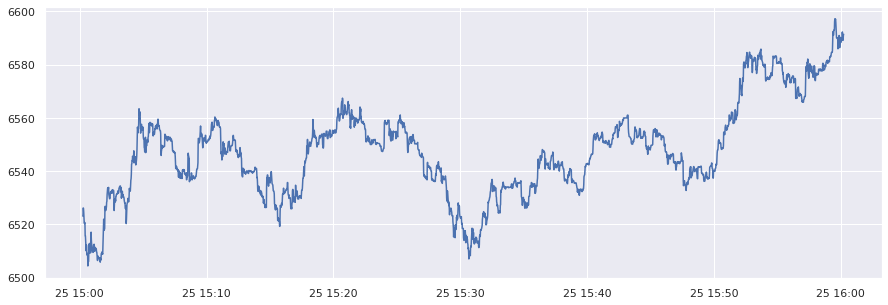

In [8]:
import datetime

def plot(data):
    data['target'] = (data['depth_bid_price_1'] + data['depth_ask_price_1']) / 2.
    data['normal_time'] = data['time'].apply(datetime.datetime.fromtimestamp)
    plt.figure(figsize=(15, 5))
    plt.plot(data['normal_time'], data['target'])
    
plot(data)

А вот как выглядят на этом графике точки, в которых нам выгодно покупать (зеленое) и продавать (красное), при комиссии в 0.1%, которая есть на Binance.

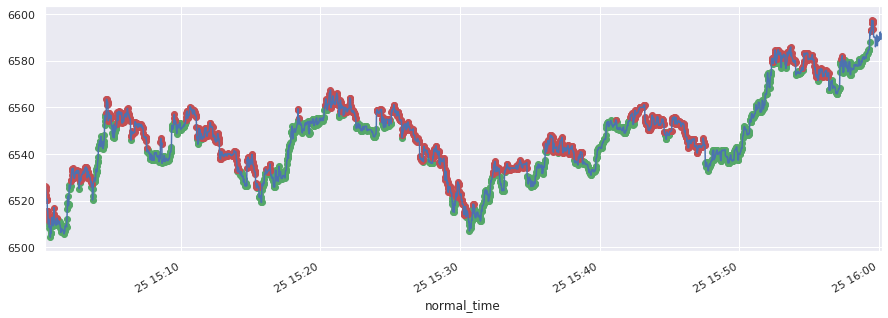

In [11]:
from stonks.auxiliary.data_preprocessing import get_state, plot_state

plt.figure(figsize=(15, 5))
plot_state(data, get_state(data, 0.001))

Вот, так что сейчас, пока мы не перешли к модному типа RL, нужно хотя бы понять, насколько хорошо работает модель, построенная на тупом бинарном классификаторе, призванном отличить красные точки от зеленых (ну еще параметр комиссии нужно подгонять, вероятно, если его чуть увеличить, например до 0.03, станет лучше - так точки гораздо более различимы. Но не факт):

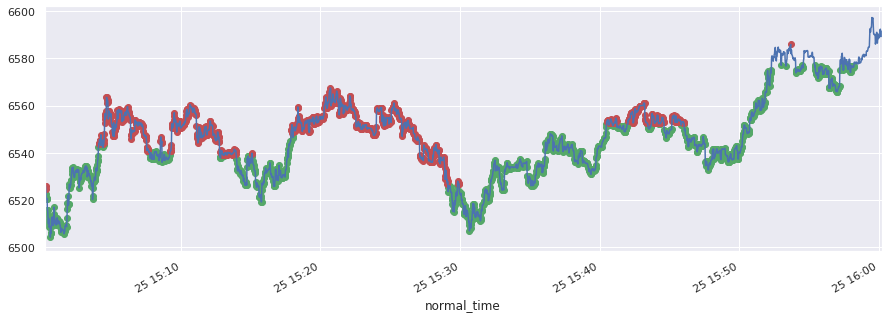

In [12]:
plt.figure(figsize=(15, 5))
plot_state(data, get_state(data, 0.003))

Так вот, на сырых фичах качество страдает, их нужно достраивать до интересных вещей. Например, [эта библиотека](https://github.com/bukosabino/ta) очень хорошо обрабатывает свечи. Но много чего можно извлечь и из ордерной книги, чем и стоит заняться.

Например, можно скопировать фичи вот у [этих чуваков](https://arxiv.org/pdf/1911.08647.pdf) (секция 4.1.1). Здесь можно очень много чего придумать.

Пример полного обучения модельки с нуля - в файлике fit.py (там, правда, цепочка вызовов функций из разных файлов).

Вот как-то так.